<a href="https://colab.research.google.com/github/NamPham1010/Machine_Learning_SPY/blob/main/ML_Project_MA_SPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Dataset
SPY historical dataset from yahoo finance

In [ ]:
# Downloading SPY historical price data
spy = yf.Ticker("SPY")
spy_price = yf.download("SPY", start = "2015-01-01", end = "2022-12-31")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Loading data into dataframe
df = pd.DataFrame(spy_price)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,175.515533,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.345749,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,170.722412,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,172.849854,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,175.917099,147217800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,379.649994,383.059998,378.029999,382.910004,378.706665,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,377.213226,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,372.525269,70911500
2022-12-29,379.630005,384.350006,379.079987,383.440002,379.230835,66970900
2022-12-30,380.640015,382.579987,378.429993,382.429993,378.231934,84022200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2015-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2014 non-null   float64
 1   High       2014 non-null   float64
 2   Low        2014 non-null   float64
 3   Close      2014 non-null   float64
 4   Adj Close  2014 non-null   float64
 5   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.1 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,297.732294,299.417815,295.867716,297.755636,277.662369,9.187613e+07
std,80.871703,81.471799,80.177458,80.853811,86.456465,4.765484e+07
min,182.339996,184.100006,181.020004,182.860001,159.456070,2.027000e+07
25%,226.322498,226.757500,225.507496,226.255001,201.462521,6.037552e+07
50%,279.395004,280.580002,277.994995,279.330002,257.639572,7.905045e+07
75%,367.944992,370.119995,364.459999,366.842506,354.430016,1.080564e+08
max,479.220001,479.980011,476.059998,477.709991,464.923401,5.072443e+08


In [ ]:
# Checking data types
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df = df.reset_index(drop=True)

In [40]:
# Reset the index and select only the columns you want to keep (excluding "No")
df = df.reset_index(drop=True)[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]


In [42]:
# Setting date columnn as a regular column
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})

In [41]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,206.380005,206.880005,204.179993,205.429993,175.515457,121465900
1,2015-01-05,204.169998,204.369995,201.350006,201.720001,172.345734,169632600
2,2015-01-06,202.089996,202.720001,198.860001,199.820007,170.722458,209151400
3,2015-01-07,201.419998,202.720001,200.880005,202.309998,172.849854,125346700
4,2015-01-08,204.009995,206.160004,203.990005,205.899994,175.917084,147217800


**Data Wrangling**

In [ ]:
# Checking for null values
null_values = df.isnull().sum()
print(null_values)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [ ]:
# removing duplicate values
df = df.drop_duplicates()

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Data Visualization


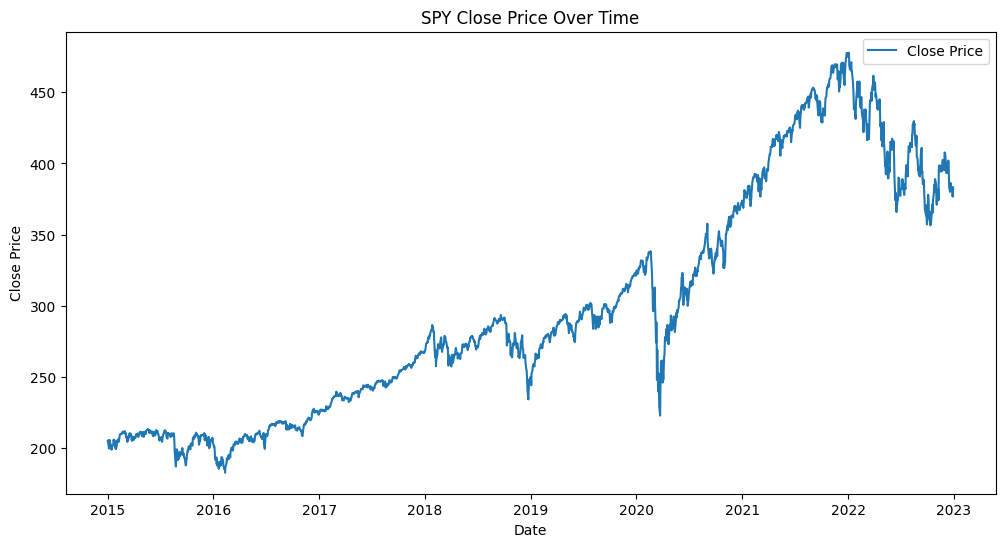

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('SPY Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Implementing the strategies